##Titanic: Machine Learning from Disaster
Kaggle : https://www.kaggle.com/ 에서 회원가입

In [1]:
import pandas as pd
from pandas import Series
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.shape

(891, 12)

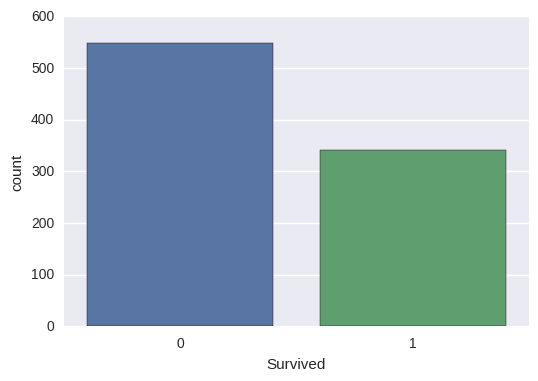

In [5]:
sns.countplot(x="Survived", data=train)

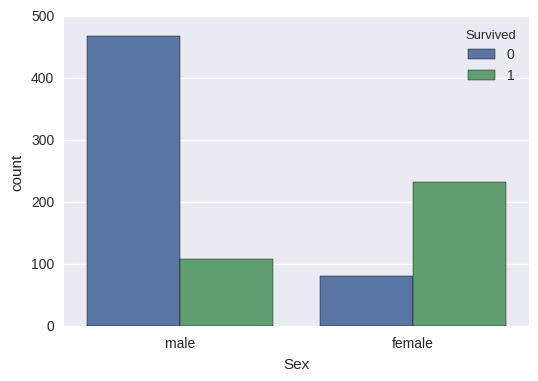

In [6]:
sns.countplot(x="Sex", hue="Survived", data=train)

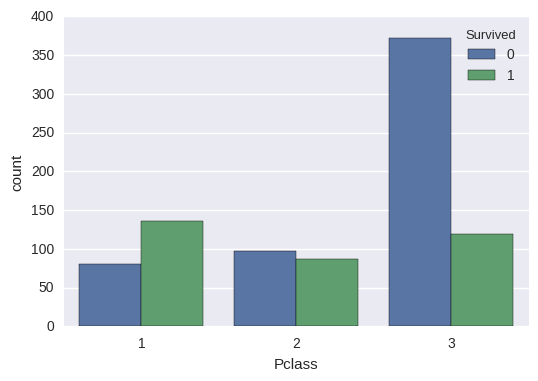

In [7]:
sns.countplot(x="Pclass",hue="Survived", data=train)

In [8]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

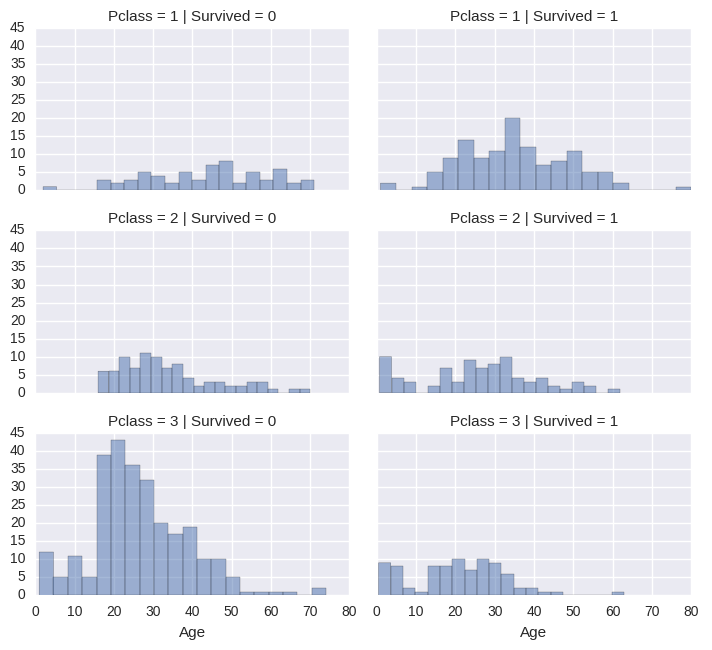

In [9]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

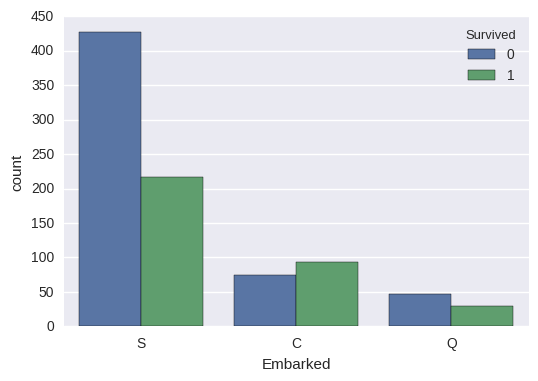

In [10]:
sns.countplot(x="Embarked", hue="Survived", data=train)

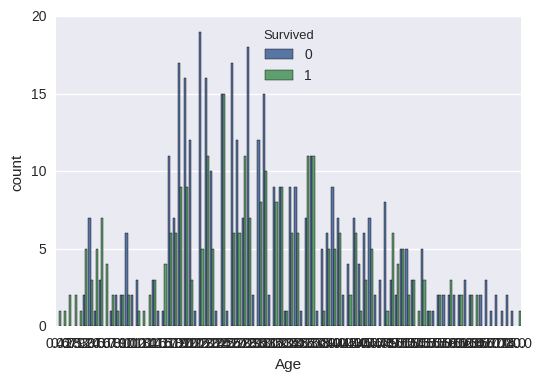

In [11]:
sns.countplot(x="Age", hue="Survived", data=train)

In [12]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
X_train = train[['Pclass','Sex','Embarked']]
Y_train = train.iloc[:,1:2]

In [16]:
X_train.head()

Pclass     Sex Embarked
0       3    male        S
1       1  female        C
2       3  female        S
3       1  female        S
4       3    male        S

In [17]:
le = LabelEncoder()
X_train.loc[:,'Sex'] = le.fit_transform(X_train['Sex'])

/home/taerim211/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
pd.options.mode.chained_assignment = None

SettingWithCopyWarning을 제거하고 싶으면
pd.options.mode.chained_assignment = None
명령 수행

In [19]:
X_train.head()

Pclass  Sex Embarked
0       3    1        S
1       1    0        C
2       3    0        S
3       1    0        S
4       3    1        S

In [20]:
X_train.loc[:,'Embarked'] = le.fit_transform(X_train['Embarked'])

/home/taerim211/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [21]:
X_train.head()

Pclass  Sex  Embarked
0       3    1         3
1       1    0         1
2       3    0         3
3       1    0         3
4       3    1         3

In [22]:
Y_train.head()

Survived
0         0
1         1
2         1
3         1
4         0

In [23]:
knn.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
test = pd.read_csv('test.csv')

In [25]:
X_test = test[['Pclass','Sex','Embarked']]
X_test.loc[:,'Embarked'] = le.fit_transform(X_test['Embarked'])
X_test.loc[:,'Sex'] = le.fit_transform(X_test['Sex'])

In [26]:
X_test.head()

Pclass  Sex  Embarked
0       3    1         1
1       3    0         2
2       2    1         1
3       3    1         2
4       3    0         2

In [27]:
Y = knn.predict(X_test)

In [28]:
with open("result.csv", "w") as f:
    f.write('PassengerId,Survived\n')
    for i in range(len(X_test)):
        f.write(str(test.loc[i][0])+','+str(Y[i])+'\n')